In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
dtype_dict = {23: str, 24: str, 70: str, 71: str}
data = pd.read_csv("C:\\Users\\Sudarsan\\OneDrive\\sudarsun\\data set\\task 5 data.csv", dtype=dtype_dict,low_memory=False)

In [12]:
data

,CASENUM,PSU,PJ,STRATUM,VE_TOTAL,VE_FORMS,PVH_INVL,PEDS,PERMVIT,PERNOTMVIT,...,LGTCON_IM,WEATHR_IM,MAXSEV_IM,NO_INJ_IM,ALCHL_IM,URBANICITY,REGION,PSUSTRAT,PSU_VAR,WEIGHT
0,201600014311,44,388,9,2,2,0,0,2,0,...,1,1,0,0,2,2,4,25,44,219.795475
1,201600014315,44,388,8,2,2,0,0,4,0,...,3,1,1,4,2,2,4,25,44,186.634758
2,201600014316,44,388,5,1,1,0,0,1,0,...,3,1,3,1,2,2,4,25,44,32.222550
3,201600014335,44,388,10,2,2,0,0,2,0,...,3,3,0,0,2,2,4,25,44,317.681532
4,201600014586,24,170,2,1,1,0,1,1,1,...,1,1,2,1,2,2,4,24,24,37.251626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46506,201600991753,41,163,7,2,2,0,0,4,0,...,1,1,0,0,2,1,4,22,41,301.125042
46507,201600991782,41,163,6,3,3,0,0,6,0,...,3,1,3,3,2,1,4,22,41,98.551521
46508,201600991811,41,163,10,2,2,0,0,3,0,...,3,1,0,0,2,1,4,22,41,357.694967
46509,201600991821,41,160,8,1,1,0,0,1,0,...,1,10,3,1,2,1,4,22,41,234.268106


Accidents by Road Condition:
            CASENUM  Count
0      201600014311      1
1      201600014315      1
2      201600014316      1
3      201600014335      1
4      201600014586      1
...             ...    ...
46506  201600991753      1
46507  201600991782      1
46508  201600991811      1
46509  201600991821      1
46510  201600991832      1

[46511 rows x 2 columns]


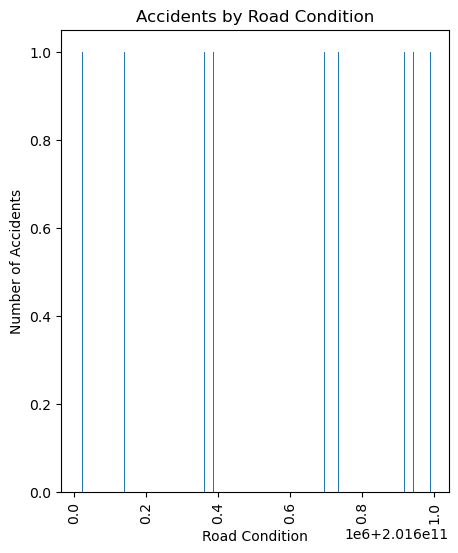

In [13]:
road_conditions =data .groupby('CASENUM').size().reset_index(name='Count')


print('Accidents by Road Condition:')
print(road_conditions)


plt.figure(figsize=(5, 6))
plt.bar(road_conditions['CASENUM'], road_conditions['Count'])
plt.xlabel('Road Condition')
plt.ylabel('Number of Accidents')
plt.title('Accidents by Road Condition')
plt.xticks(rotation=90)
plt.show()


Accidents by Weather Condition:
   REGION  Count
0       1   4178
1       2  10015
2       3  25555
3       4   6763


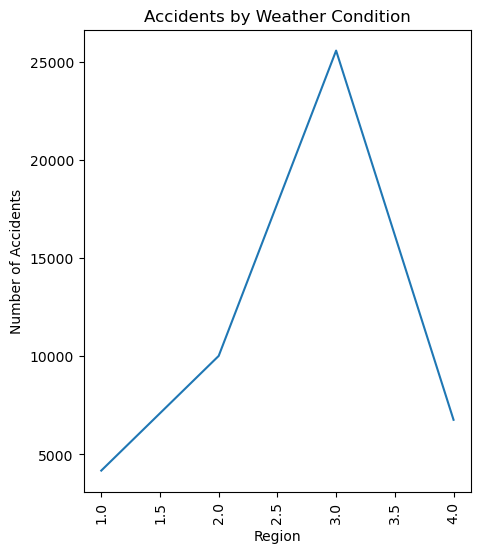

In [19]:
weather_conditions =data.groupby('REGION').size().reset_index(name='Count')

print('\nAccidents by Weather Condition:')
print(weather_conditions)

plt.figure(figsize=(5, 6),)
plt.plot(weather_conditions['REGION'], weather_conditions['Count'])
plt.xlabel('Region')
plt.ylabel('Number of Accidents')
plt.title('Accidents by Weather Condition')
plt.xticks(rotation=90)
plt.show()


Accidents by Time of Day:
  Time_of_Day  Count
0       Night   6262
1     Morning  16725
2   Afternoon  15345
3     Evening   7007


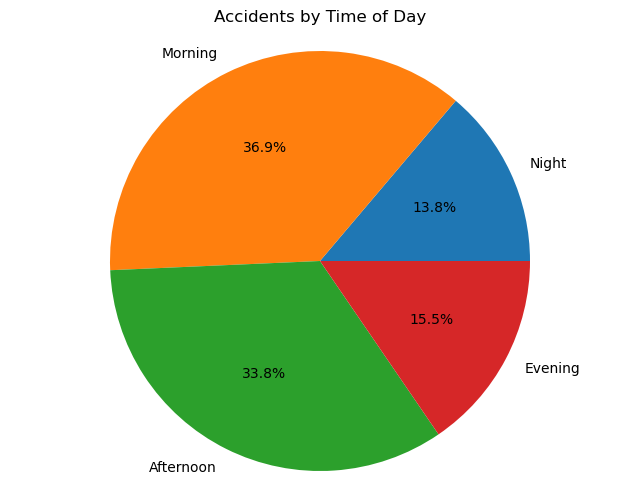

In [16]:
data['Time_of_Day'] = pd.cut(data['PSUSTRAT'], bins=[0, 6, 12, 18, 24], labels=['Night', 'Morning', 'Afternoon', 'Evening'])
time_of_day = data.groupby('Time_of_Day', observed=False).size().reset_index(name='Count')
print('\nAccidents by Time of Day:')
print(time_of_day)

plt.figure(figsize=(8, 6))
plt.pie(time_of_day['Count'], labels=time_of_day['Time_of_Day'], autopct='%1.1f%%')
plt.title('Accidents by Time of Day')
plt.axis('equal')  
plt.show()

In [27]:
import matplotlib.pyplot as plt

# Assuming you have already loaded the 'accident_data' DataFrame

# Group by 'URBANICITY' and 'V_ALCH_IM', and calculate the count
accident_locations =data.groupby(['VE_TOTAL', 'VE_FORMS']).size().reset_index(name='Count')

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(accident_locations[''], accident_locations['VE_TOTAL'], s=accident_locations['Count'], alpha=0.5)
plt.xlabel('')
plt.ylabel('VE_TOTAL')
plt.title('Accident Hotspots')
cbar = plt.colorbar()
cbar.set_label('Number of Accidents')
plt.show()


KeyError: 'V_ALCH_IM'